In [9]:
import os
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
from skimage import io

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
from skimage import io
from skimage.transform import resize
from sklearn.model_selection import train_test_split

In [11]:

# Define the directories for the tomato images with and without disease
disease_dir = "C:/Users/LOKESH/OneDrive/Desktop/Dataset"
healthy_dir = "E:/Healthy"


In [12]:

# Load the dataset of tomato images
X = []  # List to store the image data
y = []  # List to store the labels


In [20]:

# loop through the dataset and extract features and labels
for subdir, dirs, files in os.walk(disease_dir):
    for file in files:
        # load the image and resize it
        image_path = os.path.join(subdir, file)
        image = io.imread(image_path)
        resized_image = resize(image, (64, 64), anti_aliasing=True)
        # extract features from the resized image and add it to the X list
        X.append(resized_image)
        y.append(1)
#         features = np.array(resized_image).flatten()
#         X.append(features)
#         # extract the label from the filename and add it to the y list
#         label = subdir.split(os.path.sep)[-1]
#         y.append(label)


In [21]:

# Add healthy tomato images to the dataset
for img_file in os.listdir(healthy_dir):
    img = cv2.imread(os.path.join(healthy_dir, img_file))
    img = cv2.resize(img, (64, 64))  # Resize image to 64x64 pixels
    X.append(img)
    y.append(0)  # Label for healthy tomato image is 0
    

In [23]:

# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)


In [24]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [25]:

# Flatten the image data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


In [26]:

# Create KNN classifier with k=5 neighbors
clf = KNeighborsClassifier(n_neighbors=5)


In [27]:

# Train the classifier on the training set
clf.fit(X_train, y_train)


KNeighborsClassifier()

In [28]:

# Predict the labels for the testing set
y_pred = clf.predict(X_test)


In [29]:

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

In [30]:

# Print the accuracy of the classifier
print(f"Accuracy of KNN classifier: {accuracy}")


Accuracy of KNN classifier: 1.0


In [31]:

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)


In [32]:

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(5,5))


<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

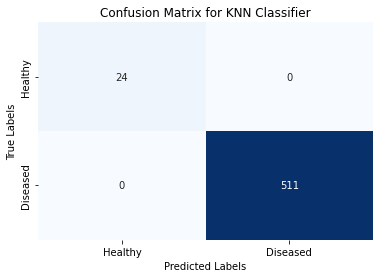

In [33]:
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=["Healthy", "Diseased"], yticklabels=["Healthy", "Diseased"])
plt.title("Confusion Matrix for KNN Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [36]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00       511

    accuracy                           1.00       535
   macro avg       1.00      1.00      1.00       535
weighted avg       1.00      1.00      1.00       535



In [35]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[ 24   0]
 [  0 511]]


In [37]:
# import necessary libraries
import numpy as np
from sklearn import svm
from skimage import io
from skimage.transform import resize

In [54]:
# load the testing image
testing_image = io.imread("C:/Users/LOKESH/OneDrive/Desktop/Dataset/Leaf_Mold/0a555f63-bf03-4958-8993-e1932b8dce9f___Crnl_L.Mold 9064.JPG")
resized_image = resize(testing_image, (64, 64), anti_aliasing=True)
image_data = np.array(resized_image).reshape(1, -1)

In [56]:
# use the trained knn model to predict the class of the testing image
predicted_class = clf.predict(image_data)
# print the predicted class
if predicted_class == 0:
    print("The testing image does not have tomato disease.")
else:
    print("The testing image has tomato disease.")

The testing image has tomato disease.


In [49]:
# load the testing image
testing_image2 = io.imread("E:/Healthy/000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1_flipTB.jpg")
resized_image2 = resize(testing_image2, (64, 64), anti_aliasing=True)
image_data2 = np.array(resized_image2).reshape(1, -1)

In [57]:
# use the trained knn model to predict the class of the testing image
predicted_class = clf.predict(image_data2)
# print the predicted class
if predicted_class == 0:
    print("The testing image does not have tomato disease.")
else:
    print("The testing image has tomato disease.")

The testing image has tomato disease.
